In [1]:
import xgboost

In [3]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [5]:
current_path = os.getcwd()
file = '\\datasets\\credit_card_data\\credit_card.csv'
data = pd.read_csv(current_path  + file)

In [6]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
data.columns
data['Class'].sum()

492

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


有些機器學習演算法沒辦法處理非數字值和空缺值。

In [12]:
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

創建一個標準化過後的特徵矩陣X，並且把標籤的欄位獨立出來Y(內涵1為詐騙0為非詐騙)

重塑我們的特徵矩陣，標準化。

In [18]:
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()
featuresToScale = dataX.drop(['Time'],axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

In [19]:
dataX

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,172787.0,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,172788.0,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,172788.0,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [20]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-7.894416e-16,2.647157e-17,-4.302564e-15,-6.662098e-16,-2.586322e-16,4.147497e-16,-8.820879e-16,-2.466016e-16,3.102531e-16,...,2.589559e-16,1.869947e-17,1.494373e-15,-6.977058e-16,1.151050e-16,-7.959207e-16,3.444180e-16,-2.454881e-18,5.251749e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


### 特徵工程
特徵工程包含建立新的特徵，舉例來說，計算原本特徵的比例或式數量或是總和，來幫助我們機器學習演算法可以提煉出更強烈的訊號。

特徵選擇包含選格特徵的子集合來做訓練，更有效的移除相對不重要的特徵，有可能預防學習過程遇到過度擬和資料集的雜訊。

在這信用卡詐騙的資料集中，我們沒有原本特正，只有從PCA提煉出來的重點元素，因為不知道有那些特徵被表現出來，因此無法使用智慧特徵工程。

特徵選擇也不被適用因為我們觀察到有284807個數包含著30個特徵，這大大的減少過度擬合的機會。 

利用皮爾森相關係數，看的出來每個特徵彼此之間的相關性並不高。代表這之間沒有冗餘的特徵。

如果有冗餘的特徵，我們可以透過降維移除或是減少這些冗餘。 這個資料集以敬使用過PCA降維了

In [25]:
correlationMatrix = pd.DataFrame(data=[], index = dataX.columns, columns = dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [26]:
correalationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.23
V2,-0.01,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.53
V3,-0.42,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.21
V4,-0.11,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.1
V5,0.17,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.39
V6,-0.06,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.22
V7,0.08,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.4
V8,-0.04,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.1
V9,-0.01,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.04


### 資料視覺化
最後一個步驟

因為沒有太多的詐騙個案可以被學習，這問一變成很難解答。
幸運的是在資料集中已經有上標籤了。

Text(0, 0.5, 'Frequency Percentage')

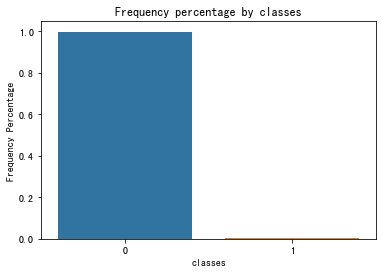

In [32]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes
ax = sns.barplot(x = count_classes.index, y = count_classes/len(data))
ax.set_title('Frequency percentage by classes')
ax.set_xlabel('classes')
ax.set_ylabel('Frequency Percentage')

### Model preparation
現在資料都準備好了，開始建模。
我們需要把資料分割成訓練集和測試集，選擇cost函數，準備k-fold 交叉驗證集。
### 分割訓練測試
未被看過資料的表現稱之為泛化誤差，評比模型好壞的重要指標之一。


In [36]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=2018, stratify = dataY)
print(X_test)
X_train

            Time        V1        V2        V3        V4        V5        V6  \
67353    52490.0  0.600923 -0.971676  0.077752 -0.889221 -1.099568 -0.260433   
67626    52625.0 -1.706842 -2.645103  0.971504 -1.579282  0.183585 -0.114004   
169699  119814.0  0.037158  0.986021 -0.074758  1.874219  1.351438  0.245319   
217315  140847.0  0.031532 -2.156211 -0.849943  1.627775 -1.133397  0.570112   
111420   72223.0 -0.720946  0.646959  1.144389  0.044563 -0.720564  0.648495   
...          ...       ...       ...       ...       ...       ...       ...   
70762    54006.0  0.599940  0.044816  0.318567  0.328286 -0.240749 -0.167651   
69843    53607.0 -3.218504 -7.556344 -2.946907  2.093479 -3.066424  0.114460   
191806  129415.0  0.315826  0.476230 -1.762871  0.014607  2.228548  2.724557   
259722  159245.0  1.024601 -0.242565 -0.337631  0.242971 -0.280451 -0.012501   
36616    38618.0  0.541473 -0.409014  0.389062 -1.218127 -0.263921  0.909760   

              V7        V8        V9  .

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
142087,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,...,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296
165168,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,...,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757
235908,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,...,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962
148255,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,...,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281
145672,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,...,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,35743.0,-0.249496,0.101075,0.909879,-0.688839,-0.389697,-0.969098,0.404471,-0.295909,-1.322352,...,0.115211,0.369245,1.209182,-0.066533,1.627214,0.628748,-0.301789,-0.110189,0.057551,-0.241283
195475,131077.0,-0.254091,-2.756705,-2.082848,0.720192,-0.770847,0.043816,1.347183,-0.309383,0.281819,...,3.172416,1.379262,-0.221650,-1.822138,0.611275,-0.865244,1.296414,-0.902976,0.455664,5.005845
48687,43742.0,0.106034,-1.131050,-0.470366,0.156445,-0.553642,-0.376423,0.654146,-0.283678,0.204805,...,1.498658,0.098597,-1.586216,-0.825029,-0.620769,0.109427,1.733472,-0.501687,0.300189,2.041624
159608,112716.0,0.055698,0.496830,-0.098914,-0.582971,0.647489,-0.393782,0.810516,-0.116346,0.031466,...,0.002229,-0.444765,-1.058758,-0.074376,-1.672445,-0.672678,0.420560,0.603711,0.263881,-0.320925


訓練集有190280個實例(67%原始資料集)，測試集有93987實例。
為了保留訓練集和測試集中的詐騙比率約在0.17%，我們使用statify參數。
為了更簡單的重現結果，設定randomstate=2018
測試集會用來評估模型的泛化誤差

### Cost function
訓練之前，需要定義成本函數，機器學習學習訓練集的過程中會試著最小化成本函數的值。

因為這個是監督式分類問題，含有兩個類別，我們使用二元分類log loss函數。會去交叉計算模型預測和真實標籤的值。


模型會產生針對每個信用卡交易產生一組詐騙機率，機率越靠近真實標籤，log loss 函數的值就越低。機器學習會試著最小化這個值。

### 創建k-fold cross-validation set
幫助模型評估測試集的表現，將訓練集分割成訓練和驗證集。


舉例來說，如果將訓練集分成五等分，4/5等分為新的訓練集，剩下第五等份拿來評估模型的預測。




In [42]:
k_fold = StratifiedKFold(n_splits=5, shuffle = True, random_state =2018)
k_fold

StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)

## ML models (part 1)

### Model1 : Logistic Regression

In [52]:
penalty = 'l2'
c = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs =1
logReg = LogisticRegression(penalty=penalty, C=c,class_weight=class_weight,
                           random_state=random_state, solver=solver,n_jobs=n_jobs)

我們把penalty設成默認值L2而非L1，L2比L1對於異常離群值沒那麼敏感，L2會指派非零權重給最近的特徵，會有一個相較穩定的答案。
L1會指派高權重給最重要的特徵剩下的都指派為接近零權重，本質上是在演算法訓練的過程中做特徵選擇。不過，因為特徵之間的權重太過多樣化，L1相較L2不穩定

C 是正則化的強度，正則化利用懲處複雜性解決過度擬和。正則化的強度越強，懲處的代價就越高。正則化將機器學習演算法推向更青睞簡易的模型。
C 一定要是正浮點數，數字越小強度越大。

我們的信用卡交易資料集非常的不平衡。284807個案中僅僅有492是詐欺個案。訓練過程中，我們希望演算法可以專注在真正被標籤的交易，也就是詐欺個案，因為資料集中的實例太稀少了。

邏輯回歸模型，設定class_weight平衡，讓演算法知道我們有不平衡族群問題。演算法訓練過程需要給予正的標籤更大的權重。在這案例，權重和族權比例會成反比，演算法賦予少數正標籤更高的權重，賦予多數的副標籤更低的權重。

而random_state設定2018，幫助讀者重現結果。


### 訓練模型
現在 超參數都已經設定完成，準備訓練五個k-fold cross-validation芬個完的邏輯回規模型

In [56]:
trainingScores = []
cvScores=[]
predictionBasedOnKFolds = pd.DataFrame(data=[], index = y_train.index, columns=[0,1])
model = logReg

for train_index,cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
#     print(loglossTraining)
    trainingScores.append(loglossTraining)
    
    predictionBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionBasedOnKFolds.loc[X_cv_fold.index, 1 ])
    cvScores.append(loglossCV)
    
    print('Training LOG LOSS: ', loglossTraining)
    print('CV log loss: ',loglossCV)
    

    
loglossLogisticRegression = log_loss(y_train, predictionBasedOnKFolds.loc[:,1])
print('Logistic Regression log loss: ',loglossLogisticRegression)
    

Training LOG LOSS:  0.10966402952589949
CV log loss:  0.10878884538718038
Training LOG LOSS:  0.10447396683589034
CV log loss:  0.10394102621198129
Training LOG LOSS:  0.1154212319984117
CV log loss:  0.11766475522303654
Training LOG LOSS:  0.11558915098848646
CV log loss:  0.11817199948230707
Training LOG LOSS:  0.09709687493084601
CV log loss:  0.09697714310275524
Logistic Regression log loss:  0.10910875388145211


## 評估結果

(通常)訓練的log loss會比cv log loss還要低
因為機器學習演算法直接從訓練集中學習，值得注意的是交叉驗證集中有明確從訓練中取出的交易

這五個批次執行，訓練和交叉驗證的log loss很相似。邏輯回規模形沒有產生嚴重的過度擬和。如果真的有，訓練集的log loss會遠低於交叉驗證集的log loss。

因為我們把預測完的結果存在五個不同的集合中，可以結合這些預測結果到同一集合中。單一集合會和原本的測試集一樣，現在可以開始計算整個訓練集最終的log loss

Logistic Regression log loss:  0.10910875388145211

## 評估指標
雖然log loss 是個不錯評估模型表現的方式，依舊還是想要有個更直覺的方式去了解結論。 舉例來說，如何找到訓練集中的詐騙交易，稱之為Recall。

### 混淆矩陣
true positives, true negatives, false positives, and false negatives 
以信用卡詐騙舉例，如果預測到所有的交易都不是詐騙的話，284315 true negatives, 492 false negatives, 0 true positives, 0 false positives，我們得到0%準確率在辨認真實詐騙交易。
處理不平衡族群問題中，混淆矩陣在捕捉這種次優結果效果不彰。

針對更平衡的族群問題(true positive的數量和true negatives大略相同)混淆矩陣的效果會還不錯。

### Precision-Recall Curve
可處理不平衡資料的問題，
Precision是true positives數量除上所有positive情況數量
precision越高代表正確率越高

recall是 true positives 除上所有positives數量

當recall很高precision很低時，代表捕捉到很多positive案同時有很多錯誤警告。也就是標籤了許多詐騙個案但是多數都並非真的是詐騙。

很明顯兩種解決方案都有重大的問題。在高precision低recall的案子中，信用卡公司會因為詐騙損失重大，但不會出現非必要拒絕交易而激怒客戶
另外一個低precisionel高recall的案子中，會捕捉到許多的詐騙個案，但大多數其實都是正常的交易。

最優的解決方案是高precision高recall的時候，只拒絕真正是詐騙交易，可以不捉到大部分的案子。

但不可能會是完美，最優化解取決於threshold，threshold高的時候比較少的案子會被預測成positive，最後會形成高precision低recall。反之。

在我們信用卡的交易紀錄資料集中，把threshold想像成模型拒絕交易的敏感度，threshold高會拒絕少數交易，但一旦他拒絕的會有很大的機會是詐騙案。

在precision和recall中遊走會形成一個曲線圖。評估這個取線圖，根據不同的threshold計算出計算加權平均精度，精度越高結果越好。

threshold的選擇很重要，通常會是由決策者決定。資料科學家展示precesion-recall曲線圖。

依照我們信用卡詐騙交易資料集，最重要的問題是我們如何利用詐騙偵測平衡客戶的使用經驗(避免拒絕正常交易)
這個問題若沒有真實歷史數據是沒辦法被回答的，但我們從模型中可以找出最佳的precision-recall曲線圖。再找出適當的threshold。

### ROC Receiver Operating Characteristic
ROC 曲線圖繪畫出true positive rate在y軸，x軸畫false positive rate。
true positive rate可以比擬成敏感度，false positive rate可以當作是單一特異性。曲線越靠近左上角預測結果越好，(0.0,1.0)為絕對優化點，意味著0% false positive rate, 100% true positive rate

評估效果: 計算曲線底下的面積，面積越大，效果越好。

#### 評估邏輯回規模型
